In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score

In [48]:
names = ["c" + str(i) for i in range(8)] + ["class"]
names_r = ["c" + str(i) for i in range(13)] + ["class"]
df = pd.read_csv('abalone.data', names=names)
df_r = pd.read_fwf('housing_Bostondata.csv', names = names_r)

In [49]:
df.head(10)

,c0,c1,c2,c3,c4,c5,c6,c7,class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [50]:
df_r.head(5)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,class
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [51]:
df.isna().sum()

c0       0
c1       0
c2       0
c3       0
c4       0
c5       0
c6       0
c7       0
class    0
dtype: int64

In [52]:
df_r.isna().sum()

c0       0
c1       0
c2       0
c3       0
c4       0
c5       0
c6       0
c7       0
c8       0
c9       0
c10      0
c11      0
c12      0
class    0
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['c0'])
df['c0'] = le.transform(df['c0'])

In [54]:
acc_arr = ()

In [55]:
X = df.values[:, :-1]
y = df.values[:, -1]
print(X.shape)
print(y.shape)

(4177, 8)
(4177,)


In [56]:
X_r = df_r.values[:, :-1]
y_r = df_r.values[:, -1]
print(X_r.shape)
print(y_r.shape)

(506, 13)
(506,)


In [57]:
scaler = MinMaxScaler()
scaler.fit_transform(X)
X = scaler.transform(X)

In [58]:
scaler_r = MinMaxScaler()
scaler.fit_transform(X_r)
X_r = scaler.transform(X_r)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape, X_test.shape

((3341, 8), (836, 8))

In [60]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
features = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'class']
Xd = X_train
Yd = y_train
dtree = DecisionTreeClassifier()
dtree = dtree.fit(Xd, Yd)
dtree_pred = dtree.predict(X_test)
dtree_f1 = f1_score(y_true = y_test , y_pred = dtree_pred,average = 'weighted')
print(dtree_f1)
acc_arr = acc_arr + (("decision tree classifier", dtree_f1),)

0.21591040243984946


In [61]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train)
y_predc = kNN.predict(X_test)
knn_clf_f1 = f1_score(y_true = y_test , y_pred = y_predc,average = 'weighted')
print(knn_clf_f1)
acc_arr = acc_arr + (("knn classifier", knn_clf_f1),)

0.20140065742819224


In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_test, y_predc))
print(classification_report(y_test, y_predc))

0.21770334928229665
              precision    recall  f1-score   support

         3.0       0.14      0.14      0.14         7
         4.0       0.14      0.20      0.17        10
         5.0       0.17      0.30      0.21        20
         6.0       0.29      0.40      0.34        50
         7.0       0.20      0.29      0.23        73
         8.0       0.17      0.27      0.21       101
         9.0       0.23      0.29      0.25       139
        10.0       0.29      0.28      0.28       134
        11.0       0.21      0.18      0.20        99
        12.0       0.21      0.12      0.15        42
        13.0       0.21      0.10      0.14        40
        14.0       0.00      0.00      0.00        27
        15.0       0.00      0.00      0.00        26
        16.0       0.12      0.05      0.07        20
        17.0       0.00      0.00      0.00        12
        18.0       0.00      0.00      0.00        12
        19.0       0.00      0.00      0.00         9
       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#Logistic regression classification
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)
logr_pred = logr.predict(X_test)
logr_clf_f1 = f1_score(y_true = y_test , y_pred = logr_pred,average = 'weighted')
print(logr_clf_f1)
acc_arr = acc_arr + (("logistic regression", logr_clf_f1),)

0.2227846466948053


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
#naive bayes classification
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
nb_clf_f1 = f1_score(y_true = y_test , y_pred = gnb_pred,average = 'weighted')
print(nb_clf_f1)
acc_arr = acc_arr + (("Naive Bayes", nb_clf_f1),)

0.19944360129488914


In [65]:
# Support Vector Machine
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_clf_f1 = f1_score(y_true = y_test , y_pred = svm_pred,average = 'weighted')
print(svm_clf_f1)
acc_arr = acc_arr + (("Support vector machine", svm_clf_f1),)

0.227691455247811


In [66]:
#Random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rfc = RandomForestClassifier(n_estimators=8)
rfc.fit(X_train, y_train)
RandomForestClassifier(n_estimators=8)
rfc_pred = rfc.predict(X_test)
rfc_clf_f1 = f1_score(y_true = y_test , y_pred = rfc_pred,average = 'weighted')
acc_arr = acc_arr + (("Random Forest", rfc_clf_f1),)

In [67]:
print(acc_arr)

(('decision tree classifier', 0.21591040243984946), ('knn classifier', 0.20140065742819224), ('logistic regression', 0.2227846466948053), ('Naive Bayes', 0.19944360129488914), ('Support vector machine', 0.227691455247811), ('Random Forest', 0.20966388316929832))


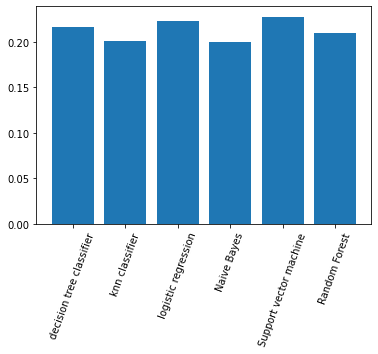

In [68]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(range(len(acc_arr)), [val[1] for val in acc_arr], align='center')
plt.xticks(range(len(acc_arr)), [val[0] for val in acc_arr])
plt.xticks(rotation=70)
plt.show()